# Imports

In [1]:
from importlib import reload
import functions as f

# for data handling 
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [2]:
# General

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y)
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Regression

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# Ridge(alpha=a, normalize=True)
from sklearn.linear_model import Lasso
# Lasso(alpha = alpha[i], normalize=True, max_iter = 1000000)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [87]:
# Classification

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from sklearn.svm import LinearSVC # LinearSVC(C=1, loss="hinge")
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=5)
# neigh.fit(X,y)

In [5]:
# Unsupervised learning

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# pca.explained_variance_ratio_
# plt.matshow(pca_pipe['pca'].components_, cmap = 'plasma')

from sklearn.manifold import MDS
# mds = MDS(n_components = 2)
# X_mds = mds.fit_transform(X)

from sklearn.manifold import LocallyLinearEmbedding
# lle = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
# X_lle = lle.fit_transform(X)

from sklearn.manifold import Isomap
# iso = Isomap(n_neighbors=160, n_components=2)
# X_iso = iso.fit_transform(X)

from sklearn.manifold import TSNE
# tsne = TSNE(n_components = 2, perplexity=50)
# X_tsne = tsne.fit_transform(X)

In [7]:
# For reloading our functions library if anything is changed
f = reload(f)

# Work

## Importing Data

In [6]:
df = pd.read_csv('magnus_nihal.csv')
df.head()

,game_id,white_player,wn_pair,wn_outpost,wn_repositioning,wn_mobility,wb_pair,wk_side_fianchetto,wq_side_fianchetto,wb_mobility,...,num_direct_trades,num_indirect_trades,num_direct_trades_white,num_indirect_trades_white,avg_time_between_direct_trade,exchanges_possible,king_squares_attacked,king_moves,king_moves_weighted,distance_from_king
0,https://lichess.org/mj97pdo9,mutdpro,0,0.00,0.227137,2.276316,0,0,0,3.802632,...,5,1,4,0,1.0,0.840000,0.105263,0,0,3.338161
1,https://lichess.org/1zhL4g8Y,DrNykterstein,0,0.12,0.949448,2.580000,0,0,0,4.120000,...,5,0,2,0,1.0,0.769231,0.000000,0,0,3.316993
2,https://lichess.org/1SfUD66e,DrNykterstein,0,0.00,0.071607,2.217391,0,0,0,3.956522,...,5,1,2,1,1.0,0.272727,0.304348,0,0,3.457792
3,https://lichess.org/WLkYFzcN,ARM-777777,0,0.00,0.000000,1.818182,0,0,0,1.272727,...,3,0,1,0,1.0,0.235294,0.727273,1,30,3.432459
4,https://lichess.org/Nd2A1c5E,DrNykterstein,0,0.00,0.000000,3.777778,0,0,0,2.722222,...,6,0,3,0,1.0,0.840000,0.444444,1,26,3.368854


In [7]:
df.columns

Index(['game_id', 'white_player', 'wn_pair', 'wn_outpost', 'wn_repositioning',
       'wn_mobility', 'wb_pair', 'wk_side_fianchetto', 'wq_side_fianchetto',
       'wb_mobility', 'wlong_diagonal_control', 'wopposite_color_b',
       'b_p_coherency', 'wn_b_trade_pref', 'wn_b_develop_pref', 'wopen_files',
       'wsemi_open_files', 'wback_rank_r', 'wdoubled_r', 'wdoubled_with_q',
       'wr_mobility', 'wq_aggression', 'wq_fianchetto', 'wq_invasion',
       'wq_mobility', 'A', 'B', 'C', 'D', 'A#', 'B#', 'C#', 'D#', 'E#',
       'w_development_side', 'wc_earliness', 'wc_side', 'wc_relative',
       'wc_artificial', 'wc_development', 'wp_king_protection',
       'wp_center_strength', 'wp_doubled', 'wp_isolated', 'wp_backward',
       'wp_tension', 'wp_color', 'wp_forwardness', 'wp_guarded_forwardness',
       'wp_en_passant', 'wp_storming', 'wp_chain_count', 'wp_longest_chain',
       'wp_non_queen', 'wb_rank', 'wb_file', 'wb_density', 'wb_attack',
       'wb_pawn_pref', 'wb_minor_pref', 'wb

In [67]:
df_copy = df.copy()

In [ ]:
for i in range(len(df_copy)):
    name = df_copy['white_player'][i]
    if name == 'DrNykterstein':
        df_copy['white_player'][i] = 'Magnus'
    elif name == 'nihalsarin2004':
        df_copy['white_player'][i] = 'Nihal'
    else:
        df_copy['white_player'][i] = None

In [71]:
df_copy.head()

,game_id,white_player,wn_pair,wn_outpost,wn_repositioning,wn_mobility,wb_pair,wk_side_fianchetto,wq_side_fianchetto,wb_mobility,...,num_direct_trades,num_indirect_trades,num_direct_trades_white,num_indirect_trades_white,avg_time_between_direct_trade,exchanges_possible,king_squares_attacked,king_moves,king_moves_weighted,distance_from_king
0,https://lichess.org/mj97pdo9,None,0,0.00,0.227137,2.276316,0,0,0,3.802632,...,5,1,4,0,1.0,0.840000,0.105263,0,0,3.338161
1,https://lichess.org/1zhL4g8Y,Magnus,0,0.12,0.949448,2.580000,0,0,0,4.120000,...,5,0,2,0,1.0,0.769231,0.000000,0,0,3.316993
2,https://lichess.org/1SfUD66e,Magnus,0,0.00,0.071607,2.217391,0,0,0,3.956522,...,5,1,2,1,1.0,0.272727,0.304348,0,0,3.457792
3,https://lichess.org/WLkYFzcN,None,0,0.00,0.000000,1.818182,0,0,0,1.272727,...,3,0,1,0,1.0,0.235294,0.727273,1,30,3.432459
4,https://lichess.org/Nd2A1c5E,Magnus,0,0.00,0.000000,3.777778,0,0,0,2.722222,...,6,0,3,0,1.0,0.840000,0.444444,1,26,3.368854


In [77]:
df_copy = df_copy.dropna()

In [78]:
X = df_copy.drop(columns = ['game_id','white_player'])
y = df_copy['white_player']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

In [81]:
y_train.iloc[10:20]

816     Magnus
1222     Nihal
901     Magnus
867     Magnus
1531     Nihal
459     Magnus
1413     Nihal
56      Magnus
1238     Nihal
401     Magnus
Name: white_player, dtype: object

In [82]:
print(len(y_train))
print(sum(y_train == 'Magnus'))
print(sum(y_train == 'Nihal'))

785
396
389


In [83]:
print(len(y_test))
print(sum(y_test == 'Magnus'))
print(sum(y_test == 'Nihal'))

197
100
97


## Dimensionality reduction

### PCA

In [84]:
n = 50
pca_pipe = Pipeline([('scale',StandardScaler()), ('pca',PCA(n_components = n))])
X_train_pipe = pca_pipe.fit_transform(X_train,y_train)

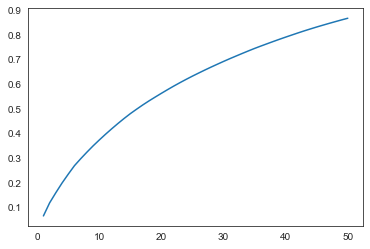

In [85]:
plt.plot(np.arange(1,n+1),np.cumsum(pca_pipe['pca'].explained_variance_ratio_))

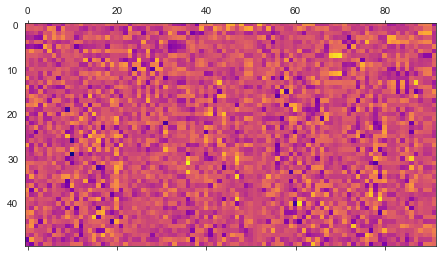

In [86]:
plt.matshow(pca_pipe['pca'].components_, cmap = 'plasma')
plt.show()

## Classification

In [88]:
neigh = KNeighborsClassifier(n_neighbors = 9)
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [89]:
pred = neigh.predict(X_test)

In [90]:
sum(pred==y_test)/len(y_test)

0.6446700507614214